In [1]:
Pkg.add("TextAnalysis")
Pkg.update()
using TextAnalysis

INFO: Nothing to be done
INFO: Updating METADATA...
INFO: Updating cache of DataFrames...
INFO: Updating cache of DataFrames...
INFO: Computing changes...
INFO: No packages to install, update or remove
INFO: Precompiling module DataFrames.
INFO: Recompiling stale cache file /home/kameeko/.julia/lib/v0.5/BinDeps.ji for module BinDeps.


In [2]:
doc001 = FileDocument("../posts_cleaned/221.txt")

A TextAnalysis.FileDocument

In [3]:
text(doc001)

"  Groups   221 of 99+      julia-users › Julia interface to the AMPL modeling language 11 posts by 4 authors      Dominique Orban    4 13 14   I just put together a few C-lang and Julia files that let users read models in the AMPL modeling language for optimization.  https:  github.com dpo ampl-jl  It's not quite a module or a package; please bear with me as I'm still learning Julia. This gives access to a huge collection of problems already written in AMPL, e.g.,  http:  orfe.princeton.edu  rvdb ampl nlmodels index.html https:  github.com mpf Optimization-Test-Problems  many of the same problems, without the solve command  http:  netlib.org ampl models  etc.  AMPL computes first and second derivatives for you, so it should be easy to pass such problems to solvers written in Julia, and to write solvers around this model format.  Cheers.     Tony Kelman    4 13 14   Hey Dominique,  This is great! I've been hoping someone would put something like this together. I was just talking about 

In [ ]:
ngrams(doc001)

In [4]:
sd = StringDocument(doc001)
prepare!(sd,strip_case | strip_whitespace)
#prepare!(sd,strip_numbers)
prepare!(sd,strip_punctuation) #leave things like 'mpi.jl' intact
ngrams(sd)

Dict{SubString{String},Int64} with 777 entries:
  "1"                          => 3
  "spent"                      => 3
  "regular"                    => 1
  "backend"                    => 1
  "layer"                      => 1
  "optimization-test-problems" => 1
  "jump's"                     => 3
  "gives"                      => 2
  "sometimes"                  => 1
  "less-mature"                => 1
  "segfaults"                  => 2
  "rather"                     => 3
  "pretty"                     => 2
  "pointer"                    => 1
  "https"                      => 4
  "and"                        => 56
  "actually"                   => 1
  "these"                      => 3
  "least"                      => 8
  "messier"                    => 1
  "floats"                     => 1
  "either"                     => 1
  "methods"                    => 3
  "possible"                   => 1
  "often"                      => 1
  ⋮                            => ⋮

In [ ]:
remove_words!(sd,["groups"])
ngrams(sd)

In [5]:
text(sd)

"groups 221 of 99+ julia-users › julia interface to the ampl modeling language 11 posts by 4 authors dominique orban 4 13 14 i just put together a few c-lang and julia files that let users read models in the ampl modeling language for optimization  https  github com dpo ampl-jl it's not quite a module or a package  please bear with me as i'm still learning julia  this gives access to a huge collection of problems already written in ampl  e g  http  orfe princeton edu rvdb ampl nlmodels index html https  github com mpf optimization-test-problems many of the same problems  without the solve command http  netlib org ampl models etc  ampl computes first and second derivatives for you  so it should be easy to pass such problems to solvers written in julia  and to write solvers around this model format  cheers  tony kelman 4 13 14 hey dominique  this is great  i've been hoping someone would put something like this together  i was just talking about this among other things with miles over in 

In [6]:
#more preprocessing
#Pkg.add("Languages.jl")
#Pkg.update()
using Languages
prepare!(sd, strip_articles)
prepare!(sd, strip_definite_articles)
prepare!(sd, strip_indefinite_articles)
prepare!(sd, strip_prepositions)
prepare!(sd, strip_pronouns)
prepare!(sd, strip_stopwords) #will destroy 'c++' -> replace c++ with cpp in preprocessing
text(sd)

" 221   99+ julia-users › julia interface     ampl modeling language 11 posts   4 authors dominique orban 4 13 14              -lang   julia files     users read models     ampl modeling language   optimization  https  github com dpo ampl-jl  '        module     package  please bear           learning julia      access     huge collection       written   ampl       http  orfe princeton edu rvdb ampl nlmodels index html https  github com mpf optimization-test-                 solve command http  netlib org ampl models etc  ampl computes       derivatives              easy   pass       solvers written   julia      write solvers     model format  cheers  tony kelman 4 13 14 hey dominique             hoping                      talking             miles     julia-opt https    google com forum  topic julia-opt cfyxcfjeocw    '      overlap     ampl       jump juliaopt            useful   forward         eventually incorporate reading   writing ampl models       jump'  representation      am

We can apply the same sort of preprocessing steps that are defined for individual documents to an entire corpus at once:

crps = Corpus({StringDocument("Document 1"),StringDocument("Document 2")})

remove_punctuation!(crps)


These operations are run on each document in the corpus individually.

In [ ]:
text(sd)

In [ ]:
ngrams(sd)

In [ ]:
eep = ngrams(sd)
yarp = ngrams(sd, 2)

In [ ]:
yarp["embarrassingly parallel"]

In [ ]:
eep["embarrassingly"]

In [7]:
Pkg.add("PyPlot")
Pkg.update()
using PyPlot

INFO: Nothing to be done
INFO: Updating METADATA...
INFO: Updating cache of DataFrames...
INFO: Updating cache of DataFrames...
INFO: Computing changes...
INFO: No packages to install, update or remove


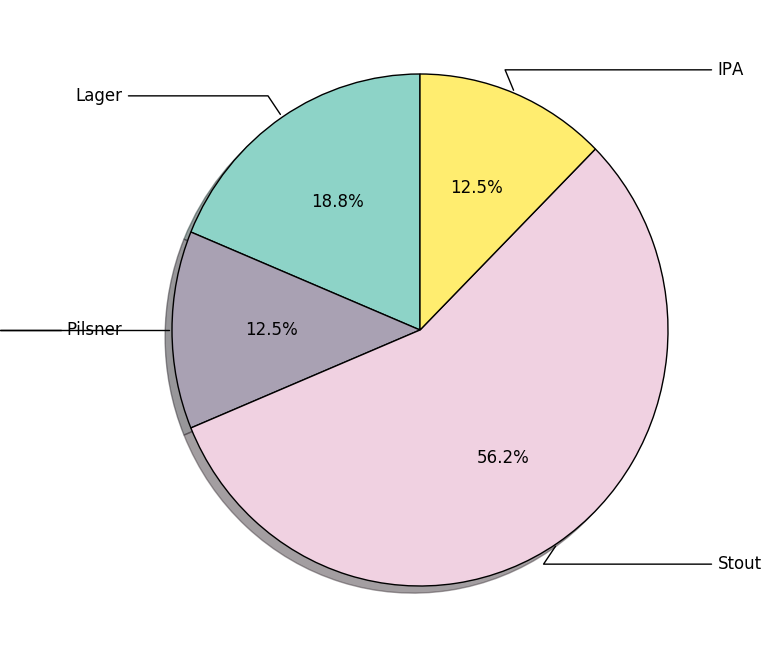

In [57]:
#################
#  Create Data  #
#################
labels = ["Lager";"Pilsner";"Stout";"IPA"]
#colors = ["yellowgreen";"gold";"lightskyblue";"lightcoral"]
sizes = NaN*zeros(4)
explode = zeros(length(sizes))
explode[2] = 0.1 # Move slice 2 out by 0.1
sizes = [15; 10; 45; 10];
#sizes *= 1./sum(sizes)
#@show sizes
my_cmap = ColorMap("Set3")
#my_norm = matplotlib.colors.Normalize(-1, 1)

###############
#  Pie Chart  #
###############
fig = figure("pyplot_piechart",figsize=(8,8))
patches, words = pie(sizes,
        #labels=labels,
        shadow=true,
        startangle=90,
colors=my_cmap(linspace(0,1,length(sizes))),
radius=1,
#colors=my_cmap(my_norm(color_vals)),
#        explode=explode,
        autopct="%1.1f%%"
)

#legend(patches,labels,loc="best")


foo = 0.
for (p1, l1) in zip(patches, labels)

    r = p1[:r]
    dr = r*0.1
    t1, t2 = p1[:theta1], p1[:theta2]
    theta = (t1+t2)/2.

    xc = cos(theta/180.*pi)*r
    yc = sin(theta/180.*pi)*r
    x1 = cos(theta/180.*pi)*(r+dr)
    y1 = sin(theta/180.*pi)*(r+dr)

    if x1 > 0.
       x1 = r+2*dr
       ha, va = "left", "center"
       cstyle="angle,angleA=180,angleB=$(-theta)"
    else
       x1 = -(r+2*dr)
       ha, va = "right", "center"
       cstyle="angle,angleA=0,angleB=$(theta)"
    end
    if foo > 0.
       if theta - foo < 10.
           y1 = y1 + 0.1
           if x1 > 0. 
               cstyle="arc,angleA=180,armA=30,armB=10,angleB=$(-theta)"
           else
               cstyle="arc,angleA=0,armA=30,armB=10,angleB=$(theta)"
            end
        end
    end

    foo = theta

    annotate(l1,
            (xc, yc), xycoords="data",
            xytext=(x1, y1), textcoords="data", ha=ha, va=va,
            arrowprops=Dict("arrowstyle"=>"-",
                            "connectionstyle"=>cstyle,
                            "patchB"=>p1))

end
            

#axis("equal")
#title("Beer")

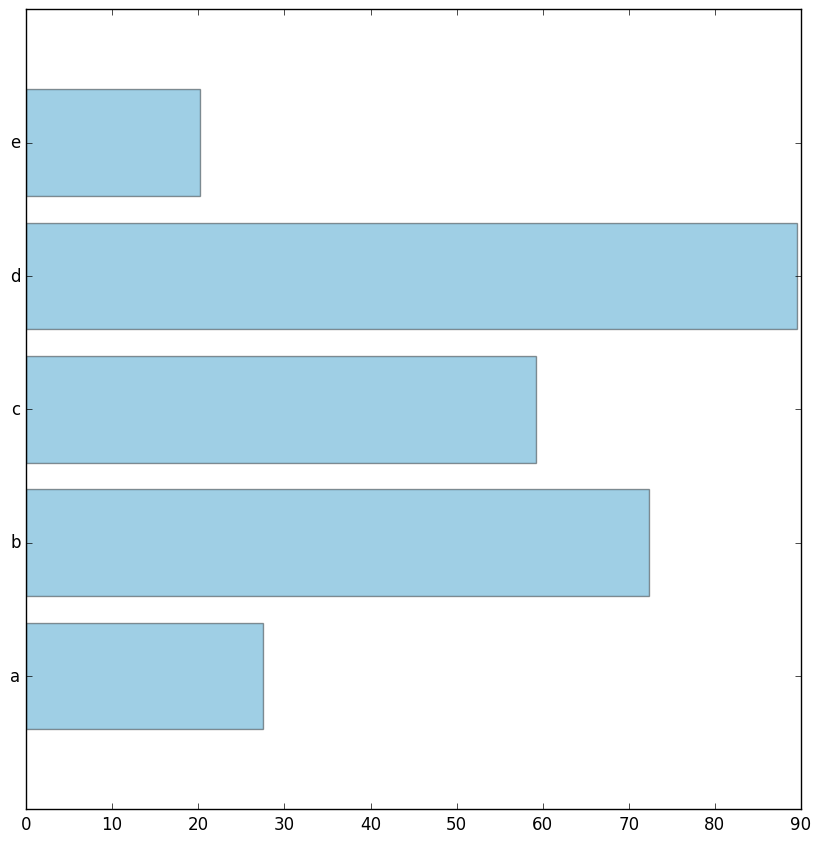

(Any[PyObject <matplotlib.axis.YTick object at 0x7fe55d1ca5d0>,PyObject <matplotlib.axis.YTick object at 0x7fe55d1ca3d0>,PyObject <matplotlib.axis.YTick object at 0x7fe55e6d35d0>,PyObject <matplotlib.axis.YTick object at 0x7fe55e6d8dd0>,PyObject <matplotlib.axis.YTick object at 0x7fe55e6b0550>],Any[PyObject <matplotlib.text.Text object at 0x7fe55d1c2fd0>,PyObject <matplotlib.text.Text object at 0x7fe55df51210>,PyObject <matplotlib.text.Text object at 0x7fe55e6d8c50>,PyObject <matplotlib.text.Text object at 0x7fe55e6b03d0>,PyObject <matplotlib.text.Text object at 0x7fe55e6b0b10>])

In [69]:
labels = ["a","b","c","d","e"]
x=1:1:5
y = 100*rand(5);
fig = figure("pyplot_barplot",figsize=(10,10))
b = barh(x,y,color="#0f87bf",align="center",alpha=0.4)
yticks(x,labels)
